In [59]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Database Connection

In [60]:
# Use of  r for directory
connection = sqlite3.connect(r'C:\Users\LENOVO\Desktop\chinook.db')
cursor=connection.cursor()

In [62]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print("List of tables:")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables:


['albums',
 'sqlite_sequence',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoices',
 'invoice_items',
 'media_types',
 'playlists',
 'playlist_track',
 'tracks',
 'sqlite_stat1']

In [24]:
invoices_data = pd.read_sql_query("Select * From invoices", connection)

In [25]:
invoices_data

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [26]:
invoices_data.shape

(412, 9)

In [29]:
for table in table_list:
    print("\n{}".format(table))
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for col in column_info.fetchall():
        print(col[1:3])


albums
('AlbumId', 'INTEGER')
('Title', 'NVARCHAR(160)')
('ArtistId', 'INTEGER')

sqlite_sequence
('name', '')
('seq', '')

artists
('ArtistId', 'INTEGER')
('Name', 'NVARCHAR(120)')

customers
('CustomerId', 'INTEGER')
('FirstName', 'NVARCHAR(40)')
('LastName', 'NVARCHAR(20)')
('Company', 'NVARCHAR(80)')
('Address', 'NVARCHAR(70)')
('City', 'NVARCHAR(40)')
('State', 'NVARCHAR(40)')
('Country', 'NVARCHAR(40)')
('PostalCode', 'NVARCHAR(10)')
('Phone', 'NVARCHAR(24)')
('Fax', 'NVARCHAR(24)')
('Email', 'NVARCHAR(60)')
('SupportRepId', 'INTEGER')

employees
('EmployeeId', 'INTEGER')
('LastName', 'NVARCHAR(20)')
('FirstName', 'NVARCHAR(20)')
('Title', 'NVARCHAR(30)')
('ReportsTo', 'INTEGER')
('BirthDate', 'DATETIME')
('HireDate', 'DATETIME')
('Address', 'NVARCHAR(70)')
('City', 'NVARCHAR(40)')
('State', 'NVARCHAR(40)')
('Country', 'NVARCHAR(40)')
('PostalCode', 'NVARCHAR(10)')
('Phone', 'NVARCHAR(24)')
('Fax', 'NVARCHAR(24)')
('Email', 'NVARCHAR(60)')

genres
('GenreId', 'INTEGER')
('Name',

In [31]:
for table in table_list:
    print("\n Table", format(table))
    df = pd.read_sql_query(f"Select * From {table}", connection)
    print(df.isnull().sum())


 Table albums
AlbumId     0
Title       0
ArtistId    0
dtype: int64

 Table sqlite_sequence
name    0
seq     0
dtype: int64

 Table artists
ArtistId    0
Name        0
dtype: int64

 Table customers
CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64

 Table employees
EmployeeId    0
LastName      0
FirstName     0
Title         0
ReportsTo     1
BirthDate     0
HireDate      0
Address       0
City          0
State         0
Country       0
PostalCode    0
Phone         0
Fax           0
Email         0
dtype: int64

 Table genres
GenreId    0
Name       0
dtype: int64

 Table invoices
InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
BillingPostalCode    

In [32]:
invoices = pd.read_sql_query("Select * From invoices", connection)

In [1]:
# # IMPORTANT
# # To get date use date col to convert into date time and then use that clummn to  extract date
# invoices["Date Time"] = pd.to_datetime(invoices["InvoiceDate"])
# invoices["Date"]=invoices["Date Time"].dt.date
# invoices["Year"]=invoices["Date Time"].dt.year
# invoices_ = invoices[(invoices["Year"]==2013)]
# # Groupby -- column select with [[to get list]] -- agg. function --> here first col is .index and next is ["Col name"]
# x = invoices_.groupby("Date")[["Date"]].count() 
# plt.figure(figsize=(18,6))
# plt.plot(x.index, x["Date"], marker="^")
# plt.xlabel("Date", fontsize = 20)
# plt.ylabel("Count", fontsize = 20)
# plt.grid("b")
# plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total'>

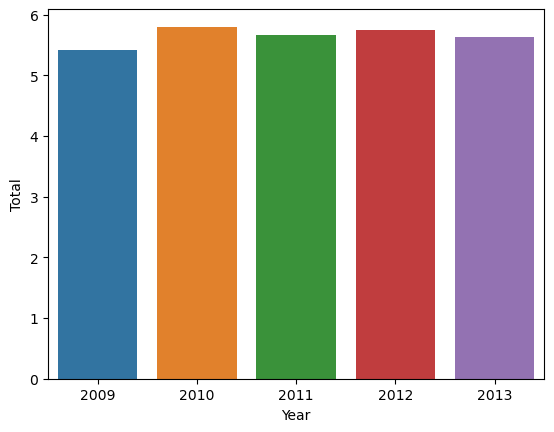

In [84]:
invoices=pd.read_sql_query("""Select InvoiceDate, Total from invoices""",connection)
invoices["Date Time"] = pd.to_datetime(invoices["InvoiceDate"])
invoices["Date"]=invoices["Date Time"].dt.date
invoices["Year"]=invoices["Date Time"].dt.year
df=invoices.groupby("Year")[["Total"]].mean()
sns.barplot(x= df.index, y = df["Total"])

#### Thus, we can continue using pandas for our analysis and seaborn-plotly for plots and so on.. 